<a href="https://colab.research.google.com/github/maoya23/Generative-Model-bigginer/blob/main/Lesson3_MultidimensionalNormalDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 生成モデルを理解する lesson3

### Chapter1 : 多次元ガウス分布

ガウス分布を多次元に拡張して考えてみる。
変数が一個のときは一次元のガウス分布で良いが、変数が増えるとそれに合わせて次元を上げる必要がある。
以下に多次元のガウス分布の式を示す。
</br>
</br>

$$
N(x: \mu,\Sigma) = \frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}  \exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)
$$
</br>
ここで、Σは分散共分散行列を表し、Dは確率変数の総数を表す。μは平均
</br>
- 変数が一つの時は分散がσで表せたが、次元が上がると、変数同士の共分散も見なくてはならない。

#### 引数とその次元

X : (1,D) ,
mu : (1,D) ,
cov : (D,D)

- 行列式の形からわかるように得られる値はスカラー値

In [ ]:
def multivariate_normal(x,mu,cov):
  det=np.linalg.det(cov)
  inv=np.linalg.inv(cov)
  D=len(x)
  z=1/np.sqrt((2*np.pi)**D*det)
  y=z*np.exp((x-mu).T @ inv @ (x-mu)/-2.0)
  return y

In [ ]:
import numpy as np

# 適当な数字で試してみる
x=np.array([[0],[0]])
mu=np.array([[1],[2]])
cov=np.array([[1,0],
              [0,1]])

y=multivariate_normal(x,mu,cov)

print(y)

[[0.01306423]]


### Chapter2 : 2次元正規分布の可視化

多次元なので、3次元でグラフを描画する。

- np.meshgridによってなめらかなグラフを作成することができる

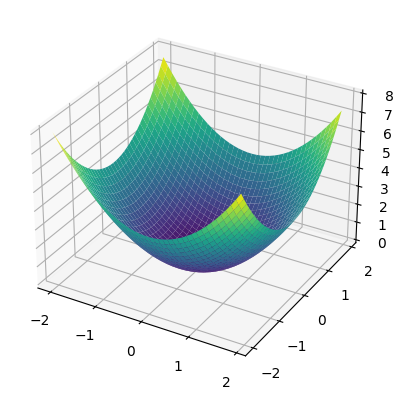

In [ ]:
import matplotlib.pyplot as plt

xs=np.arange(-2,2,0.1)
ys=np.arange(-2,2,0.1)

X,Y=np.meshgrid(xs,ys)
Z=X**2+Y**2

ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap='viridis')


#### Chapter2.1 等高線の描写

等高線はcontourで描くことができる


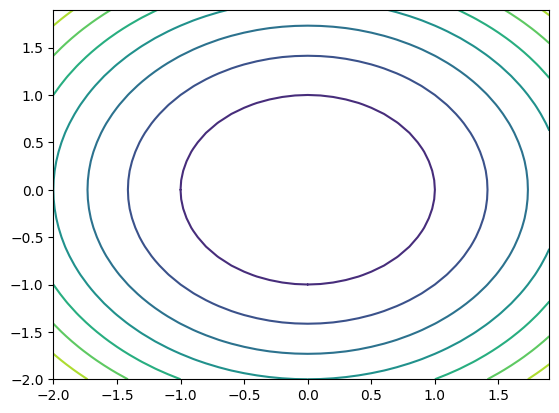

In [ ]:
ax=plt.axes()
ax.contour(X,Y,Z)

### Chapter3 : 2次元正規分布のグラフの描画

- 元の式からグラフを描画してみる。

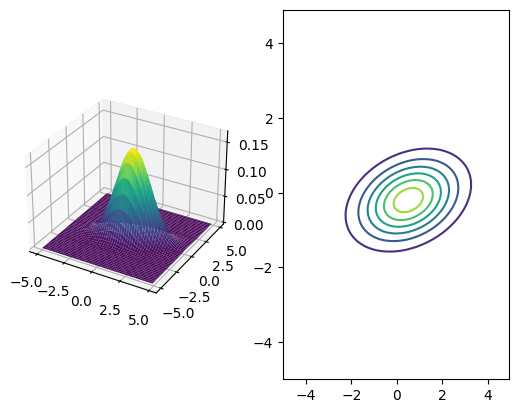

In [ ]:
mu = np.array([0.5, -0.2])
cov = np.array([[2.0,0.3],
               [0.3,0.5]])

xs=ys=np.arange(-5,5,0.1)
X,Y=np.meshgrid(xs,ys)

Z=np.zeros_like(X)

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    x=np.array([X[i,j] , Y[i,j]])
    Z[i,j]=multivariate_normal(x,mu,cov)

fig=plt.figure()
ax1=fig.add_subplot(1,2,1,projection='3d')
ax1.plot_surface(X,Y,Z,cmap='viridis')

ax2=fig.add_subplot(1,2,2)

ax2.contour(X,Y,Z)
plt.show()

## Chapter4 : 多次元ガウス分布の最尤推定

多次元のガウス分布でも最尤推定を行うと、一次元の時と同様の計算をすることによって、平均と分散は以下の式になる

$$
多次元ガウス分布の最尤推定量
多次元ガウス分布のパラメータである平均ベクトル μ と共分散行列 Σ の最尤推定量は、それぞれ標本平均と標本共分散行列で与えられる。

$$
\hat{\mu} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

$$
\hat{\Sigma} = \frac{1}{N} \sum_{i=1}^{N} (x_i - \hat{\mu})(x_i - \hat{\mu})^T
$$

In [ ]:
#最尤推定の実装

np.random.seed(42)#seed値の固定

N=10000
D=2
xs=np.random.rand(N,D)

mu=np.sum(xs,axis=0)#行方向に対して合計
mu /= N #Nで割る

cov=0
for n in range(N):
  x=xs[n]#xsのNの中のnの値を取得する　形状は(D , )
  z=x-mu
  z=z[:,np.newaxis]#ここで、zの形状を(D , )から(D , 1)に変更する
  cov += z @z.T #(D ,1)にしたことで内積を取れるようになっている

#covの計算はnp.cov(xs , rowvar=False)で計算できる

cov /= N

print(mu)
print(cov)

[0.49847358 0.50021585]
[[ 0.08294287 -0.00028931]
 [-0.00028931  0.08351517]]


### Chaper5 : 実データを使って最尤推定する

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv', index_col=False)
df = df[[ 'height','weight']]
df=df[df['height']>140]#外れ値除去
df

,height,weight
0,182,77
1,161,58
2,161,53
3,177,68
4,157,59
...,...,...
195,175,74
196,180,83
197,175,81
198,181,90


Text(0, 0.5, 'Weight')

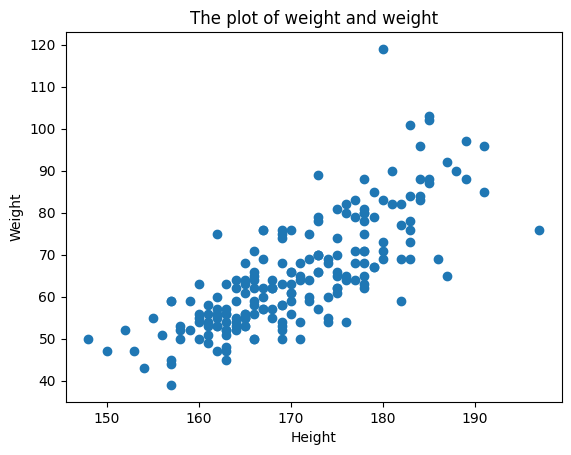

In [ ]:
#データのプロット
plt.scatter(df['height'],df['weight'])
plt.title('The plot of weight and weight')
plt.xlabel('Height')
plt.ylabel('Weight')

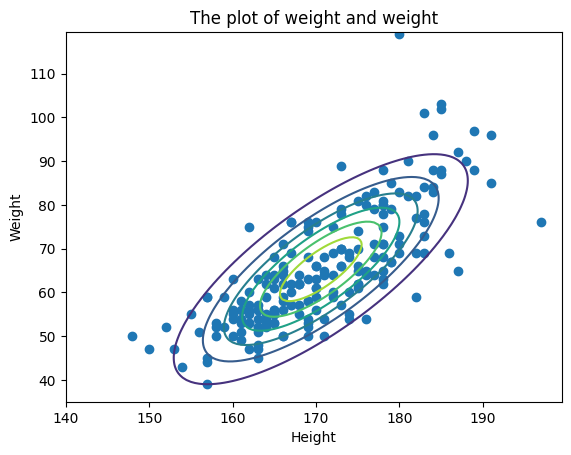

In [ ]:
#最尤推定

mu=np.mean(df,axis=0)
cov=np.cov(df , rowvar=False)

X, Y = np.meshgrid(np.arange(140, 200, 0.5),
                   np.arange(35, 120, 0.5))
Z = np.zeros_like(X)


for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

plt.scatter(df['height'],df['weight'])
plt.title('The plot of weight and weight')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.contour(X,Y,Z)
plt.show()

In [ ]:
print(mu)
print(cov)

height    170.587940
weight     65.296482
dtype: float64
[[ 80.08187402  92.03187655]
 [ 92.03187655 178.04801787]]


In [ ]:
sample=np.random.multivariate_normal(mu, cov, len(df))
df_sample=pd.DataFrame(sample,columns=['Height', 'Weight'])
df_sample

,Height,Weight
0,159.278790,40.960812
1,194.988141,84.814006
2,176.390320,82.858051
3,173.611994,74.791158
4,162.338309,40.917705
...,...,...
194,175.583867,75.700249
195,164.556296,55.172040
196,169.828888,71.057381
197,154.429254,41.299269


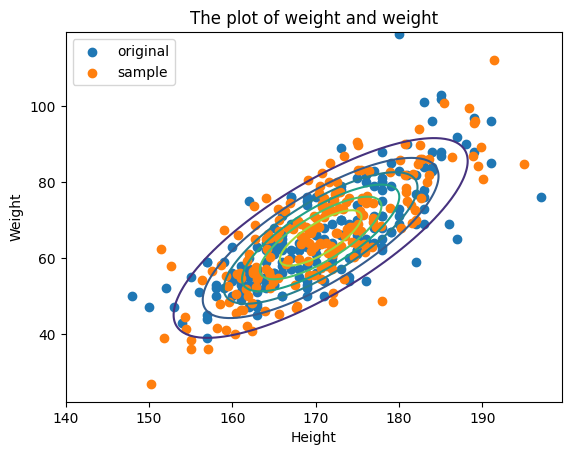

In [ ]:

X, Y = np.meshgrid(np.arange(140, 200, 0.5),
                   np.arange(35, 120, 0.5))
Z = np.zeros_like(X)


for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

plt.scatter(df['height'],df['weight'],label='original')
plt.title('The plot of weight and weight')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.contour(X,Y,Z,)
plt.scatter(df_sample['Height'],df_sample['Weight'],label='sample')
plt.legend()
plt.show()

### 演習

教科書のデータを使って実装してみる

In [ ]:
import numpy as np
import requests

url = 'https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step03/height_weight.txt'
response = requests.get(url)
response.raise_for_status()

xs = np.loadtxt(response.text.splitlines(), dtype=float)

In [ ]:
xs

array([[167.089607,  51.252494],
       [181.648633,  61.909547],
       [176.2728  ,  69.411778],
       ...,
       [164.334317,  53.644285],
       [171.524117,  59.995797],
       [174.949129,  56.641938]])